# Analysis of Budyko Data from VIC, Subsetted by Ecoregion

### Theodore Barnhart | Created: 20150306 | Updated: 20150316

Script to take the Budyko relevent data mined from Ben L.'s VIC simulations and plot it in Budyko space. 

### Foreword

This notebook goes through some analyses of the Ben's VIC simulation with the goal of elucidating a process control on the streamflow anomaly pattern shown by Berghuijs and others. 

***Generally, figures are followed by a explanative caption.*** 

In [2]:
## Front Matter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import stats
import matplotlib as mpl
#import seaborn as sns

data = pd.read_hdf('./budyko_working_er_all.hdf','df')
# define a function for computing the EI from a given DI
def budyko(DI):
    return np.sqrt(DI*np.tanh(1/DI)*(1-np.exp(-DI)))
data['PETpenvic_P'] = data['PETpenmanvic']/data['P'] # compute the dryness index
data['ET_P'] = data['ET']/data['P'] # compute the evaporative index
DI = np.arange(0,50.001,0.001) # make a range to compute the budyko curve over
EI = budyko(DI) # compute the Budyko Curve
data['pred_EI'] = data['PETpenvic_P'].apply(budyko) # compute the predicted evaportative index for each cell given its aridity
data['Q_P'] = 1.-data['ET_P'] # compute actual runoff for each cell 
data['Qpred_P'] = 1.-data['pred_EI'] # compute predicted runoff for each cell
data['Qanom_P'] = data['Q_P']-data['Qpred_P'] # compute the anomoly (actual - predicted)
data['Q'] = data.Q_P*data.P # compute Q not normalized by P
data['Qanom'] = data.Qanom_P*data.P
regions = ['Cascades','East Cascades','North Cascades','Sierra','Northern Rockies','Middle Rockies',
           'Canadian Rockies','Idaho Batholith','Wasatch',
           'Southern Rockies']

regs = [1,2,3,4,6,7,8,9,12,13] # region codes
regcs = [2,3,6,8,7,5,1,4,10,9] # 

xx = 'snowmelt'
yy = 'Qanom_P'

X = data[xx] # pull out the independant variable
y = data[yy] # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model

Sfg = np.arange(0,1.001,.001) # generate a smooth snow fraction domain

modg = Sfg*slope+intercept # generate predicted values
mods = []
rvals = []
pvals = []
slopes = []
intercepts = []
Sfs = []

for rc in regs:
    X = data.loc[data.rc==rc,xx] # pull out the independant variable
    y = data.loc[data.rc==rc,yy] # pull out the dependant variable
    slope, intrccept, r_value, p_value, std_rcr = stats.linregress(X,y) # fit the model
    Sf = np.arange(data.loc[data.rc==rc,xx].min(),data.loc[data.rc==rc,xx].max()+0.001,0.001)
    mods.append(Sf*slope+intrccept) # genrcate predicted values
    rvals.append(r_value)
    pvals.append(p_value)
    slopes.append(slope)
    intercepts.append(intercept)
    Sfs.append(Sf)
names = []

rsqrds = np.square(rvals)

for er,p,r in zip(regions,pvals,rsqrds):
    
    names.append(er+':\n p='+str(round(p,4))+', r$^2$='+str(round(r,3)))
from palettable.colorbrewer.qualitative import Paired_10 as cbcust
cbcust2 = []
for rc in regcs:
    cbcust2.append(cbcust.mpl_colors[rc-1])
    

[array([-0.06111827, -0.06109822, -0.06107818, ...,  0.57873646,
         0.5787565 ,  0.57877655]),
 array([ 0.06363038,  0.06364092,  0.06365146, ...,  0.22076238,
         0.22077292,  0.22078346]),
 array([ 0.12410814,  0.12411208,  0.12411602, ...,  0.25755299,
         0.25755693,  0.25756087]),
 array([ 0.11474197,  0.11475778,  0.1147736 , ...,  0.30453155,
         0.30454737,  0.30456318]),
 array([ 0.10029096,  0.10029357,  0.10029618, ...,  0.1407674 ,
         0.14077001,  0.14077262]),
 array([-0.03542598, -0.03539165, -0.03535731, ...,  0.34752945,
         0.34756379,  0.34759813]),
 array([ 0.05424529,  0.05426026,  0.05427524, ...,  0.22990283,
         0.22991781,  0.22993278]),
 array([-0.01443099, -0.01440322, -0.01437546, ...,  0.30409415,
         0.30412191,  0.30414967]),
 array([-0.01260028, -0.01257679, -0.01255331, ...,  0.19753449,
         0.19755797,  0.19758146]),
 array([-0.06350278, -0.0634613 , -0.06341983, ...,  0.31093998,
         0.31098145,  0.31

In [5]:
data.rc.unique()

array([ 13.,   4.,  14.,  15.,  12.,   5.,  11.,   2.,   1.,   7.,   9.,
        10.,   6.,   3.,   8.])

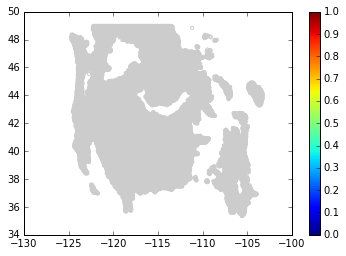

In [27]:
rc = 16
plt.scatter(data.frlon,data.frlat,s=10,c='none',edgecolors='0.8')
plt.scatter(data.loc[data.rc==rc].frlon,data.loc[data.rc==rc].frlat,s=10,c=data.loc[data.rc==rc].rc,edgecolors='none')
plt.colorbar()

# Plots

NameError: name 'tmp' is not defined

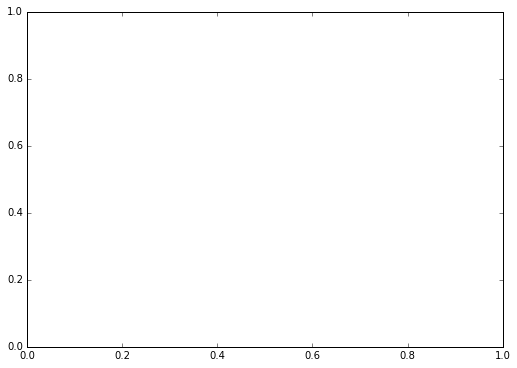

In [2]:
bgcolor = '0.35'

fig = plt.figure(figsize=(16, 6))
ax = plt.subplot2grid((1,13),(0,0), colspan = 7)
#ax.hexbin(data.PETpenvic_P,data.ET_P, gridsize=1)
ax.scatter(data.PETpenvic_P,data.ET_P,s = 10,c=data.rc, alpha=0.3, edgecolor='none', cmap=mpl.colors.ListedColormap(tmp))
ax.plot(DI,EI,'-r', lw=4)
ax.set_ylabel('Evaporative Index \n ET/P [1]',fontsize=16)
ax.set_xlabel('Dryness Index \n PET/P [1]', fontsize=16)
ax.axhline(1,c='w')
ax.axvline(1,c='w')
#ax.set_ylim(-0.2,1.2);
ax.set_xlim(0,5);
ax.set_ylim(0,1.2);
ax.set_axis_bgcolor(bgcolor)
#ax.axis('equal')
#ax.legend(['VIC Data','Budyko, 1974'], loc = 'lower right');
ax.annotate('a',[0.1,1.1], fontsize = 16, fontweight = 'bold', color='w');

ax2 = plt.subplot2grid((1,13),(0,8), colspan = 7)
#ax2.set_color_cycle(Set3_11.mpl_colors)
p1 = ax2.scatter(data.Sf,data.Qanom_P,s = 10, c = data.rc, alpha = 0.3, edgecolor = 'none', cmap=mpl.colors.ListedColormap(tmp));
cb=plt.colorbar(p1)
ct = 0
for Sf,mod in zip(Sfs,mods):
    ax2.plot(Sf,mod,'-', lw = 6, color = 'k')
    ax2.plot(Sf,mod,'-', lw = 4, color = tmp[ct])
    ct += 1
p2 = ax2.plot(Sfg,modg,'--w', lw = 5)
ax2.set_xlabel('Snowfall Fraction \n Sf [1]', fontsize = 16);
ax2.set_ylabel('Streamflow Anomoly \n (actual - predicted Q)/P', fontsize=16)
ax2.annotate('b',[0.05,0.35], fontsize = 16, fontweight = 'bold',color='w');
ax2.set_axis_bgcolor(bgcolor)
ax2.axhline(0,c='w',lw=1)
ax2.set_xlim(0,1)
ax2.set_ylim(-.2,0.4)
#cb.set_label('Ecoregion')
cb.set_ticks(np.arange(1,16))
cb.set_ticklabels(names)
cb.set_alpha(1)
cb.draw_all()

leg = ax2.legend(p2,['Global Relationship: \n p='+str(round(gp_value,3))+', r$^2$='+str(round(gr_value**2,3))])
frame = leg.get_frame()
frame.set_facecolor(bgcolor)
frame.set_edgecolor('w')
text = leg.get_texts()
text[0].set_color('w')

for l in cb.ax.yaxis.get_ticklabels():
    l.set_fontsize(14)
    
for ax, color in zip([ax, ax2], ['w', 'w']):
    plt.setp(ax.spines.values(), color=color)
    plt.setp([ax.get_xticklines(), ax.get_yticklines()], color=color)

#plt.savefig('./figures/fig1_reproduction_er_small.jpg')

#print 'r2 =',round(r_value**2,3)
#print 'p =',round(p_value,3)
#print 'slope =',round(slope,3)

***Figure 1 from Berghuijs et al.*** There is clear structure in A which cooresponds to different ecoregions. B shows the same relationship between Qanom and Sf as in Berghuijs et al.

In [3]:
slopes

[0.02004306244446424,
 0.010539406155338125,
 0.0039393313947208471,
 0.015813163179371037,
 0.0026093629443274201,
 0.034336540483281996,
 0.014972514841080203,
 0.027763020684722254,
 0.02348399295950002,
 0.041475715206836475]

In [4]:
slopes2 = np.copy(slopes)

In [5]:
slopes2 = sorted(slopes2)

In [6]:
slopes2

[0.0026093629443274201,
 0.0039393313947208471,
 0.010539406155338125,
 0.014972514841080203,
 0.015813163179371037,
 0.02004306244446424,
 0.02348399295950002,
 0.027763020684722254,
 0.034336540483281996,
 0.041475715206836475]

In [7]:
cbcust3 = np.copy(cbcust2)

In [8]:
#regions = ['2','3','1','4','9','7',
#           '10','8','5',
#           '6']
regions = ['Cascades','East Cascades','North Cascades','Sierra','Northern Rockies','Middle Rockies',
           'Canadian Rockies','Idaho Batholith','Wasatch',
           'Southern Rockies']

In [9]:
cbcust3 = [x for (y,x) in sorted(zip(slopes,cbcust2))]
Sfs2 = [x for (y,x) in sorted(zip(slopes,Sfs))]
mods2 = [x for (y,x) in sorted(zip(slopes,mods))]
regions2 = [x for (y,x) in sorted(zip(slopes,regions))]
pvals2 = [x for (y,x) in sorted(zip(slopes,pvals))]
rsqrds2 = [x for (y,x) in sorted(zip(slopes,rsqrds))]

In [10]:
names = []
for er,p,r,s in zip(regions2,pvals2,rsqrds2,slopes2):
    
    names.append(er+':\n slope='+str(round(s,3))+', r$^2$='+str(round(r,3)))

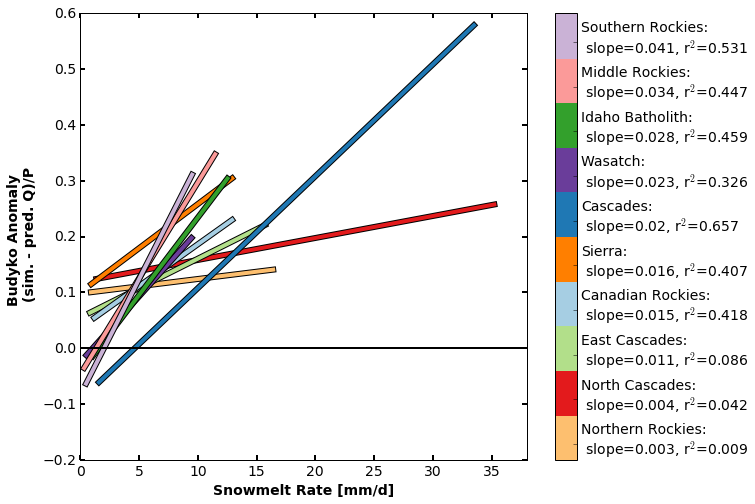

In [13]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)

p1 = ax1.scatter(data[xx],data[yy],s = 0, c = data.rc, alpha = 0.3, edgecolor = 'none', cmap=mpl.colors.ListedColormap(cbcust3));
cb=plt.colorbar(p1);
ct = 0
for Sf,mod in zip(Sfs2,mods2):
    ax1.plot(Sf,mod,'-', lw = 6, color = 'k');
    ax1.plot(Sf,mod,'-', lw = 4, color = cbcust3[ct]);
    ct += 1
ax1.set_xlabel('Snowmelt Rate [mm/d]', fontsize = 14,fontweight = 'bold');
ax1.set_ylabel('Budyko Anomaly \n (sim. - pred. Q)/P', fontsize=14,fontweight = 'bold');

#ax1.set_axis_bgcolor('w');
#ax1.axhline(y=-.2,c='k',lw=3);
#ax1.axhline(y=.4,c='k',lw=3);
#ax1.axvline(x=0,c='k',lw=3);
#ax1.axvline(x=25,c='k',lw=3)
ax1.axhline(0,c='k',lw=2);
ax1.set_xlim(0,38);
ax1.set_ylim(-.2,0.6);
ax1.tick_params(width=2,length=5);

cb.set_ticks(np.linspace(1.5,15.5,10,endpoint=False));
cb.set_ticklabels(names);
cb.set_alpha(1);
cb.draw_all();

#ax1.plot(Sfg,modg,'--k',lw=10)

for l in cb.ax.yaxis.get_ticklabels():
    l.set_fontsize(14);
    l.set_fontweight('medium');
    
    plt.setp(ax1.get_xticklabels(),fontsize=14,fontweight ='medium');
plt.setp(ax1.get_yticklabels(),fontsize=14, fontweight = 'medium');

plt.savefig('./figures/small2_ecoregions_Qanom_netSnowmelt.png',bbox_inches='tight',dpi=300)
plt.savefig('./figures/small2_ecoregions_Qanom_netSnowmelt.pdf',bbox_inches='tight')

In [20]:
pvals2

[1.234676334695812e-52,
 0.0039419056505518692,
 0.8221440565472149,
 0.096295745746624556,
 1.319584582412961e-06,
 4.2152667119954594e-10,
 9.8024017987168116e-33,
 2.9598092259469914e-47,
 2.2446613216091055e-70,
 2.0069062178244596e-160,
 1.2325273109545439e-314,
 2.1705285410817846e-106,
 1.8455188953873108e-236,
 0.0,
 0.0]

In [21]:
data.columns

Index([u'frlon', u'PETpenmanvic', u'P', u'ET', u'frlat', u'Sf',
       u'meanablseason', u'meandosnowfree', u'meanpeakswe', u'meanpeaket',
       u'meandopeaket', u'meanablslope', u'meandopeakswe', u'infilt',
       u'fs_active', u'l1_quartz', u'l3_Wpwp_FRACT', u'l3_bulkD',
       u'l3_init_moist', u'annual_prec', u'l2_soil_density', u'l2_Ksat',
       u'rough', u'l2_Wcr_FRACT', u'l2_depth', u'l2_quartz', u'l1_phi_s',
       u'l3_bubble', u'l1_expt', u'Ws', u'l1_Ksat', u'l1_soil_density',
       u'l1_resid_moisture', u'l2_phi_s', u'l2_init_moist', u'l2_expt',
       u'l1_init_moist', u'l1_depth', u'off_gmt', u'l3_expt', u'l3_depth',
       u'Dsmax', u'l1_Wpwp_FRACT', u'l3_resid_moisture', u'avg_T',
       u'l3_soil_density', u'l3_phi_s', u'dp', u'c', u'l2_bulkD', u'l2_bubble',
       u'l2_Wpwp_FRACT', u'l3_Ksat', u'l3_quartz', u'Ds', u'l1_bulkD',
       u'l1_bubble', u'l2_resid_moisture', u'elev', u'snow_rough',
       u'l1_Wcr_FRACT', u'l3_Wcr_FRACT', u'slope', u'rsquared_adj',
      

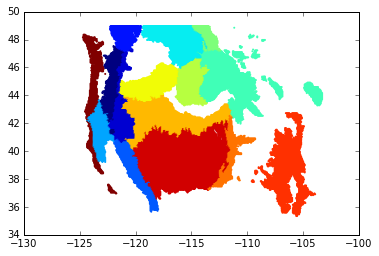

In [22]:
plt.scatter(data.frlon,data.frlat,s=4,c=data.rc, edgecolor='none')

## Create a facetted Plot of Qanom vs Sf

In [23]:
from palettable.colorbrewer.qualitative import Dark2_5 as snscmap

In [24]:
data['region'] = np.NaN

for r in xrange(1,16):
    ridx = r-1
    data.loc[data.rc==r,'region'] = regions[ridx]

IndexError: list index out of range

## Snowfall Fraction vs Streamflow Anomaly

In [25]:
xx = 'Sf'
yy = 'Qanom_P'
col = 'region'
size = 3.5

mods = []
rvals = []
pvals = []
slopes = []
intercepts = []
Sfs = []

for rc in xrange(1,16):
    X = data.loc[data.rc==rc,xx] # pull out the independant variable
    y = data.loc[data.rc==rc,yy] # pull out the dependant variable
    slope, intrccept, r_value, p_value, std_rcr = stats.linregress(X,y) # fit the model
    Sf = np.arange(data.loc[data.rc==rc,xx].min(),data.loc[data.rc==rc,xx].max()+0.001,0.001)
    mods.append(Sf*slope+intrccept) # genrcate predicted values
    rvals.append(r_value)
    pvals.append(p_value)
    slopes.append(slope)
    intercepts.append(intercept)
    Sfs.append(Sf)
    
rsqrds = np.square(rvals)
    
names = []
for reg,p,r in zip(regions,pvals,rsqrds):
    names.append(reg+': p='+str(round(p,4))+', r$^2$='+str(round(r,3)))

sns.set(style='darkgrid')
g = sns.lmplot(xx,yy,col =col, col_wrap=5, data=data, scatter_kws={'s':20,'alpha':0.3}, color=snscmap.hex_colors[0], size=size)
g.set_axis_labels(x_var='Sf [ ]',y_var='Streamflow Anomaly [ ]')
names.sort()

for ax,name in zip(g.axes.flat,names):    
    ax.set_title(name)
    ax.set_xlim([0,1])
    ax.set_ylim([-0.2,0.4])

NameError: name 'sns' is not defined

***Figure 2:*** Relationships between Snowfall fraction and Streamflow Anomaly.

## Snowmelt Rate vs Snowfall Fraction

In [26]:
xx = 'snowmelt'
yy = 'Sf'
col = 'region'
size = 3.5

mods = []
rvals = []
pvals = []
slopes = []
intercepts = []
Sfs = []

for rc in xrange(1,16):
    X = data.loc[data.rc==rc,xx] # pull out the independant variable
    y = data.loc[data.rc==rc,yy] # pull out the dependant variable
    slope, intrccept, r_value, p_value, std_rcr = stats.linregress(X,y) # fit the model
    Sf = np.arange(data.loc[data.rc==rc,xx].min(),data.loc[data.rc==rc,xx].max()+0.001,0.001)
    mods.append(Sf*slope+intrccept) # genrcate predicted values
    rvals.append(r_value)
    pvals.append(p_value)
    slopes.append(slope)
    intercepts.append(intercept)
    Sfs.append(Sf)
    
rsqrds = np.square(rvals)
    
names = []
for reg,p,r in zip(regions,pvals,rsqrds):
    names.append(reg+': p='+str(round(p,4))+', r$^2$='+str(round(r,3)))

sns.set(style='darkgrid')
g = sns.lmplot(xx,yy,col =col, col_wrap=5, data=data, scatter_kws={'s':20,'alpha':0.3}, color=snscmap.hex_colors[1], size=size)
g.set_axis_labels(x_var='Snowmelt [mm/d]',y_var='Sf [ ]')
names.sort()

for ax,name in zip(g.axes.flat,names):    
    ax.set_title(name)
    ax.set_xlim([0,35])
    ax.set_ylim([0,1])

NameError: name 'sns' is not defined

***Figure 3:*** Relationships between Snowmelt Rate and Snowfall Fraction.

## Snowmelt Rate vs Streamflow Anomaly

In [27]:
xx = 'snowmelt'
yy = 'Qanom_P'
col = 'region'
size = 3.5

mods = []
rvals = []
pvals = []
slopes = []
intercepts = []
Sfs = []

for rc in xrange(1,16):
    X = data.loc[data.rc==rc,xx] # pull out the independant variable
    y = data.loc[data.rc==rc,yy] # pull out the dependant variable
    slope, intrccept, r_value, p_value, std_rcr = stats.linregress(X,y) # fit the model
    Sf = np.arange(data.loc[data.rc==rc,xx].min(),data.loc[data.rc==rc,xx].max()+0.001,0.001)
    mods.append(Sf*slope+intrccept) # genrcate predicted values
    rvals.append(r_value)
    pvals.append(p_value)
    slopes.append(slope)
    intercepts.append(intercept)
    Sfs.append(Sf)
    
rsqrds = np.square(rvals)
    
names = []
for reg,p,r in zip(regions,pvals,rsqrds):
    names.append(reg+': p='+str(round(p,4))+', r$^2$='+str(round(r,3)))

sns.set(style='darkgrid')
g = sns.lmplot(xx,yy,col =col, col_wrap=5, data=data, scatter_kws={'s':20,'alpha':0.3}, color=snscmap.hex_colors[2], size=size)
g.set_axis_labels(x_var='Snowmelt [mm/day]',y_var='Streamflow Anomaly [ ]')
names.sort()

for ax,name in zip(g.axes.flat,names):    
    ax.set_title(name)
    ax.set_xlim([0,35])
    ax.set_ylim([-0.2,0.4])

NameError: name 'sns' is not defined

***Figure 4:*** Relationships between Snowmelt rate and streamflow anomaly. The norther rockies has a very odd shape too it. So do the north cascades. 

- Blue mtns, central basin and range, Coast Range, north basin and range : Low SWE
- Cascades, Southern Rockies, Sierra, Wasatch, ID Batholith, middle rockies: Snowmelt
- North Cascades : Rain
- Northern Rockies, East Cascades, klamath : Mixed elevation?

In [28]:
grp1 = [10,14,15,11]
grp2 = [1,13,4,12,9,7,8]
grp3 = [3]
grp4 = [6,2,5]

grp1c = [1,4,5,10]
grp2c = [3,14,13,15,7,9,2]
grp3c = [11]
grp4c = [12,6,8]

grp1n = ['Blue Mountains','Central Basin and Range','Coast Range','North Basin and Range']
grp2n = ['Cascades','Southern Rockies','Sierra','Wasatch','Idaho Batholith', 'Middle Rockies','Canadian Rockies']
grp3n = ['North Cascades']
grp4n = ['Northern Rockies','East Cascades','Klamath']

In [29]:
pallette = sns.color_palette('hls',15)

NameError: name 'sns' is not defined

NameError: name 'pallette' is not defined

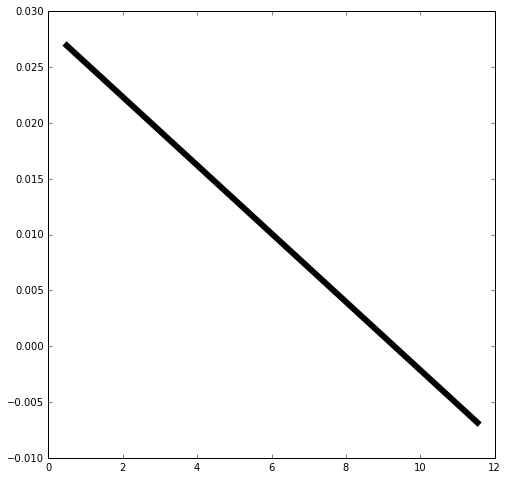

In [30]:
## Generate Group 1 figure
xx = 'snowmelt'
yy = 'Qanom_P'

mods = []
rvals = []
pvals = []
slopes = []
intercepts = []
Sfs = []

for rc in grp1:
    X = data.loc[data.rc==rc,xx] # pull out the independant variable
    y = data.loc[data.rc==rc,yy] # pull out the dependant variable
    slope, intrccept, r_value, p_value, std_rcr = stats.linregress(X,y) # fit the model
    Sf = np.arange(data.loc[data.rc==rc,xx].min(),data.loc[data.rc==rc,xx].max()+0.001,0.001)
    mods.append(Sf*slope+intrccept) # genrcate predicted values
    rvals.append(r_value)
    pvals.append(p_value)
    slopes.append(slope)
    intercepts.append(intercept)
    Sfs.append(Sf)
    
rsqrds = np.square(rvals)
    
names = []
for reg,p,r in zip(grp1n,pvals,rsqrds):
    names.append(reg+': \n p='+str(round(p,4))+', r$^2$='+str(round(r,3)))

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
#plts = []
for rc,c,slope,intercept,Sf in zip(grp1,grp1c, slopes, intercepts,Sfs):
    ax1.plot(Sf,(Sf*slope)+intercept,'-',color='k',lw=6)
    ax1.scatter(data.loc[data.rc == rc,:].snowmelt,data.loc[data.rc == rc,:].Qanom_P,s = 30, c = pallette[c-1],
                            alpha = 0.3, edgecolor = 'none');

for rc,c,slope,intercept,Sf,lab in zip(grp1,grp1c, slopes, intercepts,Sfs,names):
    ax1.plot(Sf,(Sf*slope)+intercept,'-',color=pallette[c-1],lw=3,label=lab)
    
ax1.set_xlim([0,50])
ax1.set_ylim([-0.2,0.4])

plt.setp(ax1.get_xticklabels(),fontsize=16)
plt.setp(ax1.get_yticklabels(),fontsize=16)

ax1.set_xlabel('Snowmelt Rate [mm/d]',fontsize=18)
ax1.set_ylabel('Streamflow Anomoly \n (actual - predicted Q)/P', fontsize=18)


plt.legend(fontsize=20);

plt.savefig('./figures/group1.png',bbox_inches='tight',dpi=600)

NameError: name 'pallette' is not defined

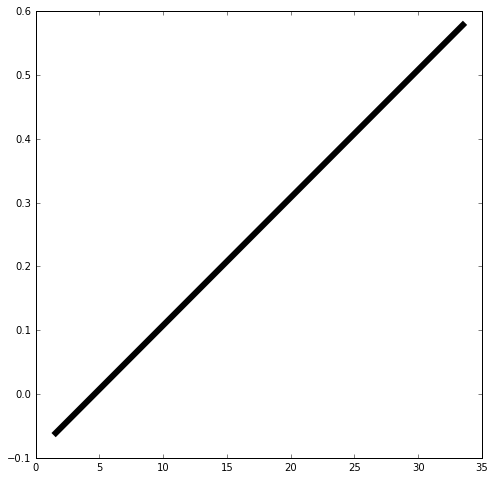

In [31]:
## Generate Group 2 figure
xx = 'snowmelt'
yy = 'Qanom_P'

mods = []
rvals = []
pvals = []
slopes = []
intercepts = []
Sfs = []

for rc in grp2:
    X = data.loc[data.rc==rc,xx] # pull out the independant variable
    y = data.loc[data.rc==rc,yy] # pull out the dependant variable
    slope, intrccept, r_value, p_value, std_rcr = stats.linregress(X,y) # fit the model
    Sf = np.arange(data.loc[data.rc==rc,xx].min(),data.loc[data.rc==rc,xx].max()+0.001,0.001)
    mods.append(Sf*slope+intrccept) # genrcate predicted values
    rvals.append(r_value)
    pvals.append(p_value)
    slopes.append(slope)
    intercepts.append(intercept)
    Sfs.append(Sf)
    
rsqrds = np.square(rvals)
    
names = []
for reg,p,r in zip(grp2n,pvals,rvals):
    names.append(reg+': \n p='+str(round(p,4))+', r$^2$='+str(round(r**2,3)))

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
#plts = []
for rc,c,mod,Sf in zip(grp2,grp2c,mods,Sfs):
    ax1.plot(Sf,mod,'-',color='k',lw=6)
    ax1.scatter(data.loc[data.rc == rc,:].snowmelt,data.loc[data.rc == rc,:].Qanom_P,s = 30, c = pallette[c-1],
                            alpha = 0.3, edgecolor = 'none');

for rc,c,mod,Sf,lab in zip(grp2,grp2c,mods,Sfs,names):
    ax1.plot(Sf,mod,'-',color=pallette[c-1],lw=3,label=lab)
    
ax1.set_xlim([0,50])
ax1.set_ylim([-0.2,0.4])

plt.setp(ax1.get_xticklabels(),fontsize=16)
plt.setp(ax1.get_yticklabels(),fontsize=16)

ax1.set_xlabel('Snowmelt Rate [mm/d]',fontsize=18)
ax1.set_ylabel('Streamflow Anomoly \n (actual - predicted Q)/P', fontsize=18)


plt.legend(fontsize=20);

plt.savefig('./figures/group2.png',bbox_inches='tight',dpi=600)

NameError: name 'pallette' is not defined

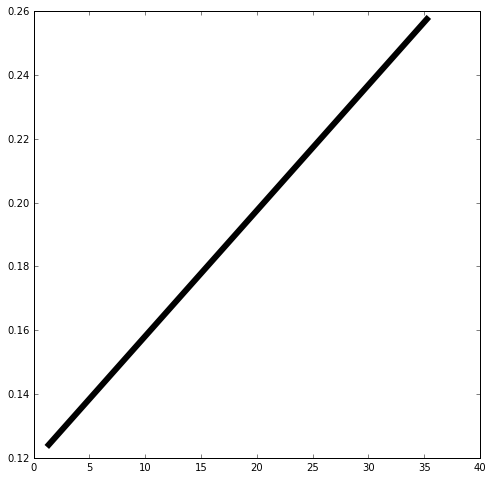

In [32]:
## Generate Group 3 figure A
xx = 'snowmelt'
yy = 'Qanom_P'

mods = []
rvals = []
pvals = []
slopes = []
intercepts = []
Sfs = []

for rc in grp3:
    X = data.loc[data.rc==rc,xx] # pull out the independant variable
    y = data.loc[data.rc==rc,yy] # pull out the dependant variable
    slope, intrccept, r_value, p_value, std_rcr = stats.linregress(X,y) # fit the model
    Sf = np.arange(data.loc[data.rc==rc,xx].min(),data.loc[data.rc==rc,xx].max()+0.001,0.001)
    mods.append(Sf*slope+intrccept) # genrcate predicted values
    rvals.append(r_value)
    pvals.append(p_value)
    slopes.append(slope)
    intercepts.append(intercept)
    Sfs.append(Sf)
    
rsqrds = np.square(rvals)
    
names = []
for reg,p,r in zip(grp3n,pvals,rvals):
    names.append(reg+': \n p='+str(round(p,4))+', r$^2$='+str(round(r**2,3)))

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
#plts = []
for rc,c,mod,Sf in zip(grp3,grp3c,mods,Sfs):
    ax1.plot(Sf,mod,'-',color='k',lw=6)
    ax1.scatter(data.loc[data.rc == rc,:].snowmelt,data.loc[data.rc == rc,:].Qanom_P,s = 30, c = pallette[c-1],
                            alpha = 0.3, edgecolor = 'none');

for rc,c,mod,Sf,lab in zip(grp3,grp3c,mods,Sfs,names):
    ax1.plot(Sf,mod,'-',color=pallette[c-1],lw=3,label=lab)
    
ax1.set_xlim([0,50])
ax1.set_ylim([-0.2,0.4])

plt.setp(ax1.get_xticklabels(),fontsize=16)
plt.setp(ax1.get_yticklabels(),fontsize=16)

ax1.set_xlabel('Snowmelt Rate [mm/d]',fontsize=18)
ax1.set_ylabel('Streamflow Anomoly \n (actual - predicted Q)/P', fontsize=18)


plt.legend(fontsize=20);

plt.savefig('./figures/group3A.png',bbox_inches='tight',dpi=600)

NameError: name 'pallette' is not defined

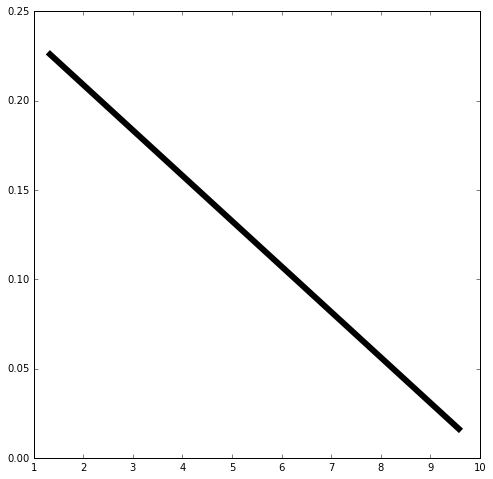

In [33]:
## Generate Group 3 figure B
xx = 'rain'
yy = 'Qanom_P'

mods = []
rvals = []
pvals = []
slopes = []
intercepts = []
Sfs = []

for rc in grp3:
    X = data.loc[data.rc==rc,xx] # pull out the independant variable
    y = data.loc[data.rc==rc,yy] # pull out the dependant variable
    slope, intrccept, r_value, p_value, std_rcr = stats.linregress(X,y) # fit the model
    Sf = np.arange(data.loc[data.rc==rc,xx].min(),data.loc[data.rc==rc,xx].max()+0.001,0.001)
    mods.append(Sf*slope+intrccept) # genrcate predicted values
    rvals.append(r_value)
    pvals.append(p_value)
    slopes.append(slope)
    intercepts.append(intercept)
    Sfs.append(Sf)
    
rsqrds = np.square(rvals)
    
names = []
for reg,p,r in zip(grp3n,pvals,rvals):
    names.append(reg+': \n p='+str(round(p,4))+', r$^2$='+str(round(r**2,3)))

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
#plts = []
for rc,c,mod,Sf in zip(grp3,grp3c,mods,Sfs):
    ax1.plot(Sf,mod,'-',color='k',lw=6)
    ax1.scatter(data.loc[data.rc == rc,:].rain,data.loc[data.rc == rc,:].Qanom_P,s = 30, c = pallette[c-1],
                            alpha = 0.3, edgecolor = 'none');

for rc,c,mod,Sf,lab in zip(grp3,grp3c,mods,Sfs,names):
    ax1.plot(Sf,mod,'-',color=pallette[c-1],lw=3,label=lab)
    
ax1.set_xlim([0,50])
ax1.set_ylim([-0.2,0.4])

plt.setp(ax1.get_xticklabels(),fontsize=16)
plt.setp(ax1.get_yticklabels(),fontsize=16)

ax1.set_xlabel('Rainfall Rate [mm/d]',fontsize=18)
ax1.set_ylabel('Streamflow Anomoly \n (actual - predicted Q)/P', fontsize=18)


plt.legend(fontsize=20);

plt.savefig('./figures/group3B.png',bbox_inches='tight',dpi=600)

NameError: name 'pallette' is not defined

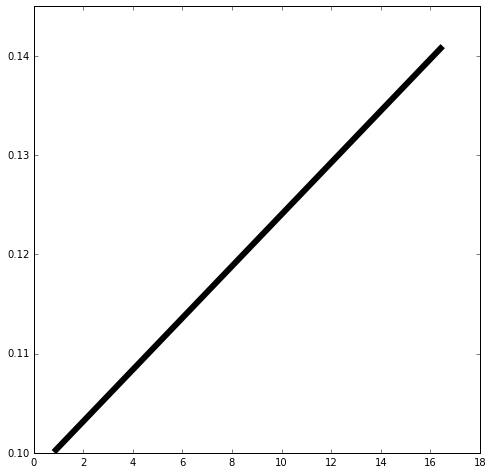

In [34]:
## Generate Group 4 figure
xx = 'snowmelt'
yy = 'Qanom_P'

mods = []
rvals = []
pvals = []
slopes = []
intercepts = []
Sfs = []

for rc in grp4:
    X = data.loc[data.rc==rc,xx] # pull out the independant variable
    y = data.loc[data.rc==rc,yy] # pull out the dependant variable
    slope, intrccept, r_value, p_value, std_rcr = stats.linregress(X,y) # fit the model
    Sf = np.arange(data.loc[data.rc==rc,xx].min(),data.loc[data.rc==rc,xx].max()+0.001,0.001)
    mods.append(Sf*slope+intrccept) # genrcate predicted values
    rvals.append(r_value)
    pvals.append(p_value)
    slopes.append(slope)
    intercepts.append(intercept)
    Sfs.append(Sf)
    
rsqrds = np.square(rvals)
    
names = []
for reg,p,r in zip(grp4n,pvals,rvals):
    names.append(reg+': \n p='+str(round(p,4))+', r$^2$='+str(round(r**2,3)))

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
#plts = []
for rc,c,mod,Sf in zip(grp4,grp4c,mods,Sfs):
    ax1.plot(Sf,mod,'-',color='k',lw=6)
    ax1.scatter(data.loc[data.rc == rc,:].snowmelt,data.loc[data.rc == rc,:].Qanom_P,s = 30, c = pallette[c-1],
                            alpha = 0.3, edgecolor = 'none');

for rc,c,mod,Sf,lab in zip(grp4,grp4c,mods,Sfs,names):
    ax1.plot(Sf,mod,'-',color=pallette[c-1],lw=3,label=lab)
    
ax1.set_xlim([0,50])
ax1.set_ylim([-0.2,0.4])

plt.setp(ax1.get_xticklabels(),fontsize=16)
plt.setp(ax1.get_yticklabels(),fontsize=16)

ax1.set_xlabel('Snowmelt Rate [mm/d]',fontsize=18)
ax1.set_ylabel('Streamflow Anomoly \n (actual - predicted Q)/P', fontsize=18)


plt.legend(fontsize=20);

plt.savefig('./figures/group4.png',bbox_inches='tight',dpi=600)

In [35]:
'Blue Mountains',
 'Canadian Rockies',
 'Cascades',
 'Central Basin and Range',
 'Coast Range',
 'East Cascades',
 'Idaho Batholith',
 'Klamath',
 'Middle Rockies',
 'North Basin and Range',
 'North Cascades',
 'Northern Rockies',
 'Sierra',
 'Southern Rockies',
 'Wasatch']

IndentationError: unexpected indent (<ipython-input-35-ed407b7afa05>, line 2)

In [36]:
1 'Cascades'
2 'East Cascades'
3 'North Cascades'
4 'Sierra'
5 'Klamath'
6 'Northern Rockies'
7 'Middle Rockies'
8 'Canadian Rockies'
9 'Idaho Batholith'
10 'Blue Mountains'
11 'North Basin and Range'
12 'Wasatch'
13 'Southern Rockies'
14 'Central Basin and Range'
15 'Coast Range'

SyntaxError: invalid syntax (<ipython-input-36-72de7872860c>, line 1)

## Water Flux vs Streamflow Anomaly

In [37]:
xx = 'wflux5'
yy = 'Qanom_P'
col = 'region'
size = 3.5

mods = []
rvals = []
pvals = []
slopes = []
intercepts = []
Sfs = []

for rc in xrange(1,16):
    X = data.loc[data.rc==rc,xx] # pull out the independant variable
    y = data.loc[data.rc==rc,yy] # pull out the dependant variable
    slope, intrccept, r_value, p_value, std_rcr = stats.linregress(X,y) # fit the model
    Sf = np.arange(data.loc[data.rc==rc,xx].min(),data.loc[data.rc==rc,xx].max()+0.001,0.001)
    mods.append(Sf*slope+intrccept) # genrcate predicted values
    rvals.append(r_value)
    pvals.append(p_value)
    slopes.append(slope)
    intercepts.append(intercept)
    Sfs.append(Sf)
    
rsqrds = np.square(rvals)
    
names = []
for reg,p,r in zip(regions,pvals,rsqrds):
    names.append(reg+': p='+str(round(p,4))+', r$^2$='+str(round(r,3)))

sns.set(style='darkgrid')
g = sns.lmplot(xx,yy,col =col, col_wrap=5, data=data, scatter_kws={'s':20,'alpha':0.3}, color=snscmap.hex_colors[3], size=size)
g.set_axis_labels(x_var='Snowmelt + rain [mm/day]',y_var='Streamflow Anomaly [ ]')
names.sort()

for ax,name in zip(g.axes.flat,names):    
    ax.set_title(name)
    ax.set_xlim([0,35])
    ax.set_ylim([-0.2,0.4])

NameError: name 'sns' is not defined

***Figure 5:*** Relationships between water flux (snowmelt + rain as long as there is no accumulation occiring, and rain when there is now snow). The north cascades have changed sign. The northern rockies still have an odd shape. Some relationships are better when rain is included, some are worse.

## Rainfall Rate vs Streamflow Anomaly

In [38]:
xx = 'rain'
yy = 'Qanom_P'
col = 'region'
size = 3.5

mods = []
rvals = []
pvals = []
slopes = []
intercepts = []
Sfs = []

for rc in xrange(1,16):
    X = data.loc[data.rc==rc,xx] # pull out the independant variable
    y = data.loc[data.rc==rc,yy] # pull out the dependant variable
    slope, intrccept, r_value, p_value, std_rcr = stats.linregress(X,y) # fit the model
    Sf = np.arange(data.loc[data.rc==rc,xx].min(),data.loc[data.rc==rc,xx].max()+0.001,0.001)
    mods.append(Sf*slope+intrccept) # genrcate predicted values
    rvals.append(r_value)
    pvals.append(p_value)
    slopes.append(slope)
    intercepts.append(intercept)
    Sfs.append(Sf)
    
rsqrds = np.square(rvals)
    
names = []
for reg,p,r in zip(regions,pvals,rsqrds):
    names.append(reg+': p='+str(round(p,4))+', r$^2$='+str(round(r,3)))

sns.set(style='darkgrid')
g = sns.lmplot(xx,yy,col =col, col_wrap=5, data=data, scatter_kws={'s':20,'alpha':0.3}, color=snscmap.hex_colors[4], size=size)
g.set_axis_labels(x_var='rain [mm/day]',y_var='Streamflow Anomaly [ ]')
names.sort()

for ax,name in zip(g.axes.flat,names):    
    ax.set_title(name)
    ax.set_xlim([0,35])
    ax.set_ylim([-0.2,0.4])

NameError: name 'sns' is not defined

***Figure 6:*** Rain seems to work well for the North Cascades and the Cascades, but the relationship is opposite from what I would expect. For the cascades the snowmelt relationship is better as well. 

## Make a Table of Different Properties for Each Region

In [39]:
vars = ['Elevation','L1 Ksat', 'Dsmax', 'Soil Depth','Binfilt', 'Q Anomaly','SD Q Anomaly','Peak SWE','Snowmelt Rate',
        'Rainfall Rate','Water Flux','SM Rsqrd','SM Pval','SM Slope','WF Rsqrd','WF Pval','WF Slope','RF Rsqrd','RF Pval',
        'RF Slope','Seasonality','MAT','P','P SD','SM Rate SD','Peak SWE SD','Elev SD','Seas SD','Elev mean Q25']
tab = pd.DataFrame(columns=vars,index=regions)


ct = 1
for reg in regions:
    tab.loc[reg,'Elevation'] = round(data.loc[data.rc==ct,:].DEMelev.mean(),0)
    tab.loc[reg,'L1 Ksat'] = round(data.loc[data.rc==ct,:].l1_Ksat.mean(),2)
    tab.loc[reg,'Dsmax'] = round(data.loc[data.rc==ct,:].Dsmax.mean(),2)
    tab.loc[reg,'Q Anomaly'] = round(data.loc[data.rc==ct,:].Qanom_P.mean(),2)
    tab.loc[reg,'SD Q Anomaly'] = round(data.loc[data.rc==ct,:].Qanom_P.std(),2)
    tab.loc[reg,'Peak SWE'] = round(data.loc[data.rc==ct,:].meanpeakswe.mean(),2)
    tab.loc[reg,'Snowmelt Rate'] = round(data.loc[data.rc==ct,:].snowmelt.mean(),1)
    tab.loc[reg,'Rainfall Rate'] = round(data.loc[data.rc==ct,:].rain.mean(),1)
    tab.loc[reg,'Water Flux'] = round(data.loc[data.rc==ct,:].wflux5.mean(),1)
    tab.loc[reg,'Binfilt'] = round(data.loc[data.rc==ct,:].infilt.mean(),3)
    tab.loc[reg,'Seasonality'] = round(data.loc[data.rc==ct,:].seas.mean(),3)
    tab.loc[reg,'MAT'] = round(data.loc[data.rc==ct,:].MAT.mean(),3)
    tab.loc[reg,'P'] = round(data.loc[data.rc==ct,:].P.mean(),3)
    
    tab.loc[reg,'P SD'] = round(data.loc[data.rc==ct,:].P.std(),3)
    tab.loc[reg,'SM Rate SD'] = round(data.loc[data.rc==ct,:].snowmelt.std(),3)
    tab.loc[reg,'Peak SWE SD'] = round(data.loc[data.rc==ct,:].meanpeakswe.std(),3)
    tab.loc[reg,'Elev SD'] = round(data.loc[data.rc==ct,:].DEMelev.std(),3)
    tab.loc[reg,'Seas SD'] = round(data.loc[data.rc==ct,:].seas.std(),3)
    
    tmp = data.loc[data.rc==ct,:].DEMelev.as_matrix()
    q25 = np.percentile(tmp,0.25)
    tmp = tmp[tmp<=q25]
    
    tab.loc[reg,'Elev mean Q25'] = round(np.mean(tmp),3)
    
    
    xx = 'snowmelt'
    yy = 'Qanom_P'
    
    X = data.loc[data.rc==ct,xx] # pull out the independant variable
    y = data.loc[data.rc==ct,yy] # pull out the dependant variable
    slope, intrccept, r_value, p_value, std_rcr = stats.linregress(X,y) # fit the model
    
    tab.loc[reg,'SM Rsqrd'] = round(r_value**2,3)
    tab.loc[reg,'SM Pval'] = round(p_value,3)
    tab.loc[reg,'SM Slope'] = round(slope,3)
    
    
    xx = 'wflux5'
    yy = 'Qanom_P'
    
    X = data.loc[data.rc==ct,xx] # pull out the independant variable
    y = data.loc[data.rc==ct,yy] # pull out the dependant variable
    slope, intrccept, r_value, p_value, std_rcr = stats.linregress(X,y) # fit the model
    
    tab.loc[reg,'WF Rsqrd'] = round(r_value**2,3)
    tab.loc[reg,'WF Pval'] = round(p_value,3)
    tab.loc[reg,'WF Slope'] = round(slope,3)
    
    xx = 'rain'
    yy = 'Qanom_P'
    
    X = data.loc[data.rc==ct,xx] # pull out the independant variable
    y = data.loc[data.rc==ct,yy] # pull out the dependant variable
    slope, intrccept, r_value, p_value, std_rcr = stats.linregress(X,y) # fit the model
    
    tab.loc[reg,'RF Rsqrd'] = round(r_value**2,3)
    tab.loc[reg,'RF Pval'] = round(p_value,3)
    tab.loc[reg,'RF Slope'] = round(slope,3)
    
    l1sd = data.loc[data.rc==ct,'l1_depth']
    l2sd = data.loc[data.rc==ct,'l2_depth']
    l3sd = data.loc[data.rc==ct,'l3_depth']
        
    #tab.loc[reg,'Soil Depth'] = np.mean(np.sum([l1sd,l2sd,l3sd], axis=0))
    tab.loc[reg,'Soil Depth'] = np.mean(l1sd)
    
    ct += 1

### Table Key:

SM - Snowmelt [mm/day]

WF - Water Flux (snowmelt + rain) [mm/day]

RF - Rainfall Rate [mm/day]

In [40]:
tab.sort(columns=['SM Rsqrd'], inplace=True)

/Users/barnhatb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [41]:
tab

,Elevation,L1 Ksat,Dsmax,Soil Depth,Binfilt,Q Anomaly,SD Q Anomaly,Peak SWE,Snowmelt Rate,Rainfall Rate,...,RF Slope,Seasonality,MAT,P,P SD,SM Rate SD,Peak SWE SD,Elev SD,Seas SD,Elev mean Q25
Southern Rockies,1305,832.57,11.01,0.1,0.184,0.11,0.1,172.29,3,2.1,...,-0.054,0.328,6.13,1.542,0.742,2.068,209.923,319.624,0.147,512.667
Middle Rockies,1123,886.04,10.87,0.1,0.215,0.11,0.08,369.99,5.6,2.8,...,-0.038,0.279,5.086,2.272,0.933,2.985,296.301,307.833,0.164,461.714
North Cascades,1183,1421.19,10.63,0.1,0.299,0.15,0.08,952.77,9.1,4.1,...,-0.025,0.489,3.518,4.828,2.606,4.302,636.794,456.337,0.12,109.333
East Cascades,1393,2031.87,10.53,0.1,0.212,0.09,0.08,187.09,3.6,2.4,...,-0.003,0.509,6.632,1.69,0.786,2.259,210.611,342.982,0.104,189.5
Northern Rockies,927,713.66,10.15,0.1,0.17,0.12,0.08,240.37,4.3,6.8,...,-0.007,0.689,9.116,4.115,1.787,2.25,314.681,388.711,0.076,168.75
Sierra,1901,1627.43,9.15,0.1,0.111,0.19,0.06,419.11,5.5,4.7,...,-0.002,0.699,6.969,3.027,1.078,2.455,337.167,685.145,0.061,484.75
Idaho Batholith,1756,773.1,10.86,0.1,0.301,0.15,0.06,652.85,7.5,3.4,...,0.049,0.23,1.641,3.313,0.957,2.497,304.702,264.898,0.128,1017.5
Canadian Rockies,2097,613.18,7.8,0.1,0.127,0.05,0.1,218.87,2.9,2.2,...,0.036,-0.106,2.217,1.687,0.643,1.956,210.25,511.088,0.29,992.923
Wasatch,1927,1185.18,11.45,0.1,0.116,0.12,0.1,507.42,5.9,2.7,...,0.038,0.339,2.303,2.458,0.765,2.387,262.522,394.842,0.137,809.2
Cascades,1044,1068.41,10.64,0.1,0.292,0.07,0.1,635.79,8.2,5.9,...,-0.028,0.542,6.311,5.253,1.559,3.94,520.542,456.589,0.057,145


***Table 1:*** It looks like Peak SWE and Rainfall Rate can explain a lot of the bad relationships (Coast Range, Central Basin and Range, North Basin and Range). For some areas either snowmelt rate or water flux is a better predictor.

r2: 0.22
pVal: 0.172


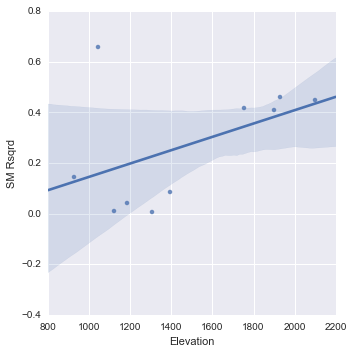

In [29]:
xx = 'Elevation'
yy = 'SM Rsqrd'

slope, intrccept, r_value, p_value, std_rcr = stats.linregress(tab[xx],tab[yy]) # fit the model

sns.lmplot(xx,yy,tab)

print 'r2:',round(r_value**2,3)
print 'pVal:',round(p_value,3)